# Mini Notebook: Put the data into a pytorch dataset and dataloader object

In [ ]:
from utils.notebook_1_utils import * 
import utils.notebook_1_utils as utils

training_df = pd.read_csv("data/training.csv").iloc[:50]
lookup_df = pd.read_csv("data/IdLookupTable.csv")
training_df.fillna(method = 'ffill',inplace = True)

In [2]:
train_X, train_Y, val_X, val_Y = create_train_test_sets(training_df)

In [3]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape

((5640, 96, 96, 1), (5640, 30), (1409, 96, 96, 1), (1409, 30))

In [4]:
type(train_X[0][0][0][0])

numpy.float64

In [5]:
type(train_Y[0][0])

numpy.float64

In [6]:
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

from keras import Sequential, optimizers
from keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional,ConvLSTM2D,GRU,SimpleRNN,RNN
from keras import regularizers
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D, Conv2D , MaxPooling2D

model = Sequential()
model.add((Conv2D(filters=128, kernel_size=4, input_shape=(96, 96, 1),activation='relu', padding='same')))
model.add(Dense(64,activation='relu'))

model.add(Conv2D(32, 4, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Conv2D(16, 4, activation='relu'))
model.add(Conv2D(32, 4, activation='relu'))
model.add(Conv2D(32, 4, activation='relu'))

model.add((MaxPooling2D(pool_size=(4,4))))


model.add(Flatten())


model.add(Dense(30))


opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['msle'])

In [7]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 128)       2176      
                                                                 
 dense (Dense)               (None, 96, 96, 64)        8256      
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 32)        32800     
                                                                 
 dense_1 (Dense)             (None, 93, 93, 32)        1056      
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 16)        8208      
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 32)        8224      
                                                                 
 conv2d_4 (Conv2D)           (None, 84, 84, 32)        1

In [8]:
model.fit(train_X, train_Y, batch_size=128, epochs=25)

Epoch 1/2
45/45 [==============================] - 12s 166ms/step - loss: 1.6785 - msle: 1.6785
Epoch 2/2
45/45 [==============================] - 7s 160ms/step - loss: 1.2826 - msle: 1.2826


## Predictions

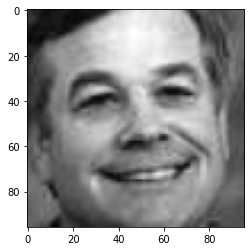

In [9]:
plt.imshow(val_X[0].reshape(96,96),cmap='gray')
plt.show()

In [10]:
preds = model.predict(val_X)

45/45 [==============================] - 1s 17ms/step


In [11]:
preds.shape

(1409, 30)

In [12]:
preds.shape

(1409, 30)

In [13]:
val_X.shape

(1409, 96, 96, 1)

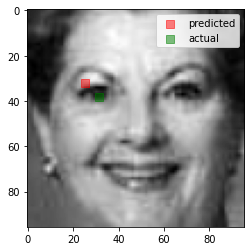

In [14]:


def show_pred(index,point):
    plt.imshow(val_X[index],cmap='gray')



    plt.scatter(preds[index][point],preds[index][point + 1],c='r', marker='s', s=60, alpha=.5)
    plt.scatter(val_Y[index][point],val_Y[index][point+1],c='g', marker='s', s=60, alpha=.5)

    plt.legend(['predicted','actual'])
    
show_pred(3, 2)


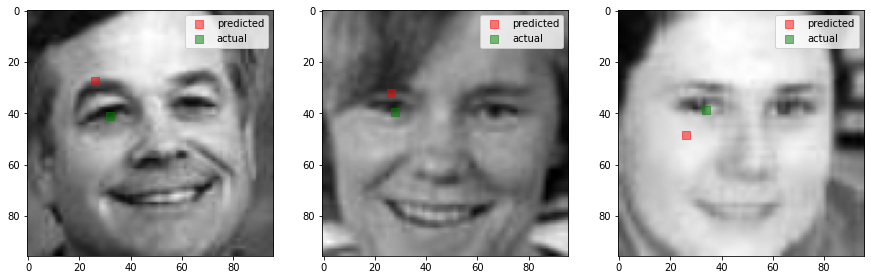

In [15]:
def show_preds(n, index,point):
    fig, ax = plt.subplots(1, n, figsize=(15, 5))
    for i in range(n):
        ax[i].imshow(val_X[index + i],cmap='gray')
        ax[i].scatter(preds[index + 1][point],preds[index + i][point + 1],c='r', marker='s', s=60, alpha=.5)
        ax[i].scatter(val_Y[index + i][point],val_Y[index + i][point+1],c='g', marker='s', s=60, alpha=.5)
        ax[i].legend(['predicted','actual'])
    
show_preds(3, 0, 2)

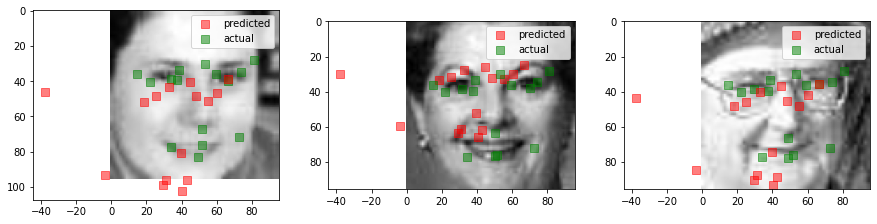

In [16]:
def show_all_preds(n, index):
    fig, ax = plt.subplots(1, n, figsize=(15, 5))
    for i in range(n):
        ax[i].imshow(val_X[index + i],cmap='gray')
        for point in range(0,29, 2):
            ax[i].scatter(preds[index + 1][point],preds[index + i][point + 1],c='r', marker='s', s=60, alpha=.5)
            ax[i].scatter(val_Y[index + i][point],val_Y[index + i][point+1],c='g', marker='s', s=60, alpha=.5)
        ax[i].legend(['predicted','actual'])
    
show_all_preds(3, 2)
    

## Using torch dataloader and dataset class to format data

In [17]:
from torch.utils.data import Dataset, DataLoader

In [18]:
# ?DataLoader
# ??Dataset

In [19]:
class KeypointsDataset(Dataset):
    def __init__(self, images, keypoints):
        self.images = torch.from_numpy(images).float()
        self.keypoints = torch.from_numpy(keypoints).float()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        keypoint = self.keypoints[index]
        return image, keypoint

In [20]:
val_X.shape, val_Y.shape

((1409, 96, 96, 1), (1409, 30))

In [21]:
dataset = KeypointsDataset(train_X, train_Y)
data_loader = DataLoader(dataset, batch_size=64,shuffle=False)

In [22]:
dataset

In [23]:
data_loader

In [24]:
for idx,batch in enumerate(data_loader):
    print("batch size: ", batch[0].size())
    print("batch idx: ",  idx)
    print("batch label: " , batch[1])
    break

batch size:  torch.Size([64, 96, 96, 1])
batch idx:  0
batch label:  tensor([[66.0336, 39.0023, 30.2270,  ..., 72.9355, 43.1307, 84.4858],
        [64.3329, 34.9701, 29.9493,  ..., 70.2666, 45.4679, 85.4802],
        [65.0571, 34.9096, 30.9038,  ..., 70.1918, 47.2749, 78.6594],
        ...,
        [65.4344, 36.8582, 29.2612,  ..., 64.6193, 46.6466, 83.6869],
        [65.4425, 36.5345, 29.1397,  ..., 68.2994, 47.2911, 80.6751],
        [65.7883, 34.7457, 26.6281,  ..., 70.4505, 47.6476, 81.9679]])


In [25]:
for idx, (data,target) in enumerate(data_loader):
    print(data[0].shape)
    print(target[0].shape)
    break

torch.Size([96, 96, 1])
torch.Size([30])
